In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.DataFrame([[20, 10, 0], 
                        [80, 60, 1], 
                        [-20, 10, 1]], columns=['x1', 'x2', 'classe'])

In [4]:
dataset

,x1,x2,classe
0,20,10,0
1,80,60,1
2,-20,10,1


In [5]:
def f(x):
    return 0 if x<=0 else 1

In [6]:
tx = 0.2

In [49]:
def calcula_delta_w(att: np.array, 
                    pesos: np.array, 
                    classe: int) -> np.array:
    net = att*pesos
    net = net.sum()
    
    y = f(net)
    
    delta = classe - y
    
    delta_w = tx*delta*att
    
    linha_dict = {
        'x1': att[0], 
        'x2': att[1], 
        'xv': att[2],
        'w1': pesos[0], 
        'w2': pesos[1], 
        'wv': pesos[2],
        'classe': classe, 
        'net': net, 
        'y': y, 
        'delta': delta, 
        'delta_1': delta_w[0], 
        'delta_2': delta_w[1], 
        'delta_v': delta_w[2], 
    }
    return linha_dict, delta_w

In [50]:
peso = np.array([0.1, 0.1, 0.1])

In [51]:
linhas_lista = []

In [56]:
for _, linha in dataset.iterrows():
    att = np.append(linha[['x1', 'x2']].values, 1)
    nova_linha, delta_w = calcula_delta_w(att, 
                                          peso, 
                                          linha['classe'], 
                                          )
    linhas_lista.append(nova_linha)
    peso = peso + delta_w

pd.DataFrame(linhas_lista)
    
    
#     print(linha[['x1', 'x2']].values)    
#     print(type(linha[['x1', 'x2']].values))

,x1,x2,xv,w1,w2,wv,classe,net,y,delta,delta_1,delta_2,delta_v
0,20,10,1,0.1,0.1,0.1,0,3.1,1,-1,-4.0,-2.0,-0.2
1,80,60,1,-3.9,-1.9,-0.1,1,-426.1,0,1,16.0,12.0,0.2
2,-20,10,1,12.1,10.1,0.1,1,-140.9,0,1,-4.0,2.0,0.2
3,20,10,1,8.1,12.1,0.3,0,283.3,1,-1,-4.0,-2.0,-0.2
4,80,60,1,4.1,10.1,0.1,1,934.1,1,0,0.0,0.0,0.0
5,-20,10,1,4.1,10.1,0.1,1,19.1,1,0,-0.0,0.0,0.0
6,20,10,1,4.1,10.1,0.1,0,183.1,1,-1,-4.0,-2.0,-0.2
7,80,60,1,0.1,8.1,-0.1,1,493.9,1,0,0.0,0.0,0.0
8,-20,10,1,0.1,8.1,-0.1,1,78.9,1,0,-0.0,0.0,0.0
9,20,10,1,0.1,8.1,-0.1,0,82.9,1,-1,-4.0,-2.0,-0.2


In [57]:
peso

array([-3.9,  6.1, -0.3])

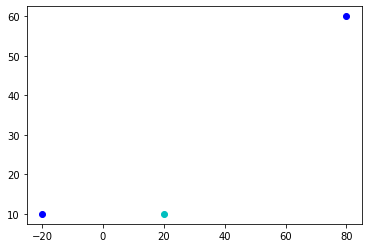

In [61]:
for _, linha in dataset.iterrows():
    cor = 'c' if linha['classe'] == 0 else 'b'
    plt.scatter(x=linha['x1'], y=linha['x2'], color=cor)
plt.show()

### Reta
w1*x1 + w2*x2 + wv = 0

w2*x2= -w1*x1 - wv 

x2= (-w1*x1 - wv ) / w2

x2= (-w1/w2)*x1 - wv/w2



In [63]:
x_i = -25
x_f = 85
y_i = (-peso[0]/peso[1])*x_i - peso[2]/peso[1]
y_f = (-peso[0]/peso[1])*x_f - peso[2]/peso[1]

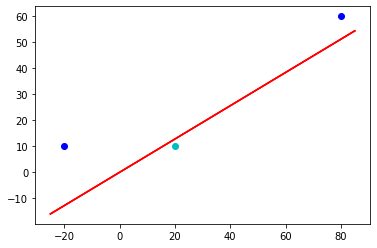

In [64]:
for _, linha in dataset.iterrows():
    cor = 'c' if linha['classe'] == 0 else 'b'
    plt.scatter(x=linha['x1'], y=linha['x2'], color=cor)
    plt.plot([x_i, x_f], [y_i, y_f], color='r')
plt.show()